<a href="https://colab.research.google.com/github/EslamKampoza/Deep-Learning-Crash-Course-on-Youtube-/blob/main/RCA_smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
!pip install metric-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
import pandas as pd
import time
from matplotlib import pyplot
import numpy as np
import itertools
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.pipeline import Pipeline
import sklearn.neural_network as nn
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
#Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
#from imblearn.over_sampling import SMOTE
from sklearn.decomposition import TruncatedSVD

In [122]:
def plot_confusion_matrix (cm, classes, normalize=False, title='Confusion Matrix', cmap=pyplot.cm.Blues,
                           decsnTreeClf=None):
    #This function prints and plots the confusion matrix.
    pyplot.imshow(cm,interpolation='nearest',cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks=np.arange(len(classes))
    pyplot.xticks(tick_marks,classes,rotation=45)
    pyplot.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j,i,cm[i,j],horizontalalignment="center", color="white" if cm[i,j]> thresh else "black" )

    pyplot.tight_layout()
    pyplot.ylabel('True Label')
    pyplot.xlabel('Predicted Label')
    pyplot.show()


In [123]:
train = pd.read_csv('WISDM.csv',header=None)
train = train[(train != '?').all(axis=1)]
#test = pd.read_csv('test.csv')
labels = train[train.columns[len(train.columns)-1]]
Data = train[train.columns[:-1]]
peek=train.head()
print(peek)
print(train.shape)

   0     1     2     3     4     5     6     7     8     9   ...      35  \
0  33  0.04  0.09  0.14  0.12  0.11  0.10  0.08  0.13  0.13  ...  293.94   
1  33  0.12  0.12  0.06  0.07  0.11  0.10  0.11  0.09  0.12  ...  269.44   
2  33  0.14  0.09  0.11  0.09  0.09  0.11  0.12  0.08  0.05  ...  248.65   
3  33  0.06  0.10  0.09  0.09  0.11  0.07  0.12  0.10  0.14  ...  709.09   
4  33  0.12  0.11  0.10  0.08  0.10  0.14  0.10  0.11  0.08  ...    3300   

        36    37    38    39    40    41    42     43       44  
0     1550  3.29  7.21  4.00  4.05  8.17  4.05  11.96  Jogging  
1  1233.33  4.23  6.88  4.05  5.43  8.19  5.43  12.05  Jogging  
2     1780  4.18  6.89  4.07  5.55  8.19  5.55  11.99  Jogging  
3     1380  2.26  4.13  2.49  2.87  4.95  2.87  10.69  Walking  
4     1775  2.29  3.94  2.41  3.08  4.64  3.08  10.80  Walking  

[5 rows x 45 columns]
(4944, 45)


In [124]:
!pip install metric_learn
import metric_learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
encoder = LabelEncoder()

#encoding test labels

encoder.fit(labels)
labels_int = encoder.transform(labels)

In [126]:
#mmc = metric_learn.MMC_Supervised()
#X_mmc = mmc.fit_transform(Data, labels_int)
mmc = metric_learn.RCA()
X_mmc = mmc.fit(Data, labels_int)

/usr/local/lib/python3.7/dist-packages/metric_learn/rca.py:82: UserWarning: The inner covariance matrix is not invertible, so the transformation matrix may contain Nan values. You should remove any linearly dependent features and/or reduce the dimensionality of your input, for instance using `sklearn.decomposition.PCA` as a preprocessing step.
  warnings.warn('The inner covariance matrix is not invertible, '
/usr/local/lib/python3.7/dist-packages/metric_learn/rca.py:130: RuntimeWarning: invalid value encountered in sqrt
  return (vecs / np.sqrt(vals)).dot(vecs.T)


In [127]:
Data.shape

(4944, 44)

In [128]:
MM = mmc.get_mahalanobis_matrix()

In [129]:
MM.shape

(44, 44)

In [130]:
import numpy as np
import random
from sklearn.neighbors import NearestNeighbors
import math
from random import randint
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA




class Smote(object):
	"""docstring for Smote"""

	def __init__(self,distance,MM):
		super(Smote, self).__init__()
		self.synthetic_arr=  []
		self.newindex = 0
		self.distance_measure = distance
		self.mmc = MM       



	def Populate(self,N,i,indices,min_samples,k):
		"""
    		Populates the synthitic array


    		Returns:Synthetic Array to generate_syntheic_points 
    	"""

		while N!=0:
			arr = []
			nn = randint(0,k-2)
			features = len(min_samples[0])
			
			for attr in range(features):
				diff = min_samples[indices[nn]][attr] - min_samples[i][attr]
				gap = random.uniform(0,1)
				arr.append(min_samples[i][attr] + gap*diff)
			
			self.synthetic_arr.append(arr)
			self.newindex = self.newindex + 1
			N = N-1



	def k_neighbors(self,euclid_distance,k):
		nearest_idx_npy = np.empty([euclid_distance.shape[0],euclid_distance.shape[0]],dtype=np.int64)
		
		for i in range(len(euclid_distance)):
			idx = np.argsort(euclid_distance[i])
			nearest_idx_npy[i] = idx
			idx = 0

		return nearest_idx_npy[:,1:k]




	def find_k(self,X,k):

		"""
   			Finds k nearest neighbors using euclidian distance

   			Returns: The k nearest neighbor   
    	"""




		euclid_distance = np.empty([X.shape[0],X.shape[0]],dtype = np.float32)
		
		for i in range(len(X)):
			dist_arr = []
			for j in range(len(X)):
				dist_arr.append(math.sqrt(sum((X[j]-X[i])**2)))
			dist_arr = np.asarray(dist_arr,dtype = np.float32)
			euclid_distance[i] = dist_arr

		return self.k_neighbors(euclid_distance,k)






	def generate_synthetic_points(self,min_samples,N,k):

		"""
    		Returns (N/100) * n_minority_samples synthetic minority samples.
    		Parameters
    		----------
    		min_samples : Numpy_array-like, shape = [n_minority_samples, n_features]
    		    Holds the minority samples
    		N : percetange of new synthetic samples: 
    		    n_synthetic_samples = N/100 * n_minority_samples. Can be < 100.
    		k : int. Number of nearest neighbours. 
    		Returns
    		-------
    		S : Synthetic samples. array, 
    		    shape = [(N/100) * n_minority_samples, n_features]. 
    	"""
		

		if N < 100:
			raise ValueError("Value of N cannot be less than 100%")

		if self.distance_measure not in ('euclidian','ball_tree','Mahal'):
			raise ValueError("Invalid Distance Measure.You can use only Euclidian or ball_tree")


		if k>min_samples.shape[0]:
			raise ValueError("Size of k cannot exceed the number of samples.")

		
		N = int(N/100)
		T = min_samples.shape[0]
		
		

		if self.distance_measure == 'euclidian':
				indices = self.find_k(min_samples,k)
			
		elif self.distance_measure=='ball_tree':
			nb = NearestNeighbors(n_neighbors = k,algorithm= 'ball_tree').fit(min_samples)
			distance,indices = nb.kneighbors(min_samples)
			indices = indices[:,1:]	
		elif self.distance_measure=='Mahal':
			nb = NearestNeighbors(n_neighbors = k,metric = mmc.get_metric()).fit(min_samples)
			distance,indices = nb.kneighbors(min_samples)
			indices = indices[:,1:]	


		for i in range(indices.shape[0]):
			self.Populate(N,i,indices[i],min_samples,k)
		
		return np.asarray(self.synthetic_arr)

		


	def plot_synthetic_points(self,min_samples,N,k):
		"""

			Plot the over sampled synthtic samples in a scatterplot



		"""


		if N < 100:
			raise ValueError("Value of N cannot be less than 100%")

		if self.distance_measure not in ('euclidian','ball_tree','Mahal'):
			raise ValueError("Invalid Distance Measure.You can use only Euclidian or ball_tree")


		if k>min_samples.shape[0]:
			raise ValueError("Size of k cannot exceed the number of samples.")

		
		synthetic_points = self.generate_synthetic_points(min_samples,N,k)
		
		pca = PCA(n_components=2)
		pca.fit(synthetic_points)
		pca_synthetic_points = pca.transform(synthetic_points)
		
		plt.scatter(pca_synthetic_points[:,0],pca_synthetic_points[:,1])
		plt.show()
		

In [131]:
unique,counts = np.unique(labels,return_counts = True)
dict(zip(unique,counts))

{'Downstairs': 507,
 'Jogging': 1612,
 'Sitting': 134,
 'Standing': 75,
 'Upstairs': 587,
 'Walking': 2029}

In [132]:
mask = train[44] == 'Downstairs'
Downstairs = train[mask]
Downstairs = Downstairs.replace("Downstairs", 1.0)
N = (2029-507) * 100/507
k = 12
Downstairs = np.float_(Downstairs)
smote_test1 = Smote('Mahal',mmc)
new_dsta = smote_test1.generate_synthetic_points(Downstairs[:,:44],N,k)

myclass = np.array(["Downstairs" for x in range(len(new_dsta))])
#myclass = ["Standing" for x in range(1500)]
myclass = myclass.reshape(len(new_dsta),1)
new_dsta = np.hstack((new_dsta[:,:44],myclass))

In [133]:
mask = train[44] == 'Upstairs'
Upstairs = train[mask]
Upstairs = Upstairs.replace("Upstairs", 1.0)
N = (2029-100) * 100/587
k = 12
Upstairs = np.float_(Upstairs)
smote_test1 = Smote('Mahal',mmc)
new_Upsta= smote_test1.generate_synthetic_points(Upstairs[:,:44],N,k)
myclass = np.array(["Upstairs" for x in range(len(new_Upsta))])
#myclass = ["Standing" for x in range(1500)]
myclass = myclass.reshape(len(new_Upsta),1)
new_Upsta = np.hstack((new_Upsta[:,:44],myclass))

In [134]:
mask = train[44] == 'Sitting'
Sitting = train[mask]
Sitting = Sitting.replace("Sitting", 2.0)
N = (2029-134) * 100/134
k = 12
Sitting = np.float_(Sitting)
smote_test1 = Smote('Mahal',mmc)
new_Sit= smote_test1.generate_synthetic_points(Sitting[:,:44],N,k)
myclass = np.array(["Sitting" for x in range(len(new_Sit))])
#myclass = ["Standing" for x in range(1500)]
myclass = myclass.reshape(len(new_Sit),1)
new_Sit = np.hstack((new_Sit[:,:44],myclass))

In [135]:
mask1 = train[44] == 'Standing'
Standing = train[mask1]
Standing = Standing.replace("Standing", 0.0)
N = (2029-75) * 100/75
k = 12
Standing = np.float_(Standing)
smote_test = Smote('Mahal',mmc)
new_sta = smote_test.generate_synthetic_points(Standing[:,:44],N,k)
myclass = np.array(["Standing" for x in range(len(new_sta))])
#myclass = ["Standing" for x in range(1500)]
myclass = myclass.reshape(len(myclass),1)
my_sta = np.hstack((new_sta[:,:44],myclass))

In [136]:
mask1 = train[44] == 'Jogging'
Jogging = train[mask1]
Jogging = Jogging.replace("Jogging", 0.0)
N = 105
k = 12
Jogging = np.float_(Jogging)
smote_test = Smote('Mahal',mmc)
new_jog = smote_test.generate_synthetic_points(Jogging[:,:44],N,k)
myclass = np.array(["Jogging" for x in range(len(new_jog))])
#myclass = ["Standing" for x in range(1500)]
myclass = myclass.reshape(len(myclass),1)
new_jog = np.hstack((new_jog[:,:44],myclass))

In [137]:
new_train_data = np.concatenate((Data, my_sta[:,:44]), axis=0)
new_train_data = np.concatenate((new_train_data, new_dsta[:,:44]), axis=0)
new_train_data = np.concatenate((new_train_data, new_Upsta[:,:44]), axis=0)
new_train_data = np.concatenate((new_train_data, new_Sit[:,:44]), axis=0)
new_train_data = np.concatenate((new_train_data, new_jog[:(2029-1612),:44]), axis=0)

new_train_labels = np.concatenate((labels, my_sta[:,-1]), axis=0)
new_train_labels = np.concatenate((new_train_labels, new_dsta[:,-1]), axis=0)
new_train_labels = np.concatenate((new_train_labels, new_Upsta[:,-1]), axis=0)
new_train_labels = np.concatenate((new_train_labels, new_Sit[:,-1]), axis=0)
new_train_labels = np.concatenate((new_train_labels, new_jog[:(2029-1612),-1]), axis=0)

new_train_labels = new_train_labels.reshape(len(new_train_labels),1)


In [138]:
full= np.hstack((new_train_data,new_train_labels))
unique,counts = np.unique(new_train_labels,return_counts = True)
dict(zip(unique,counts))

{'Downstairs': 2028,
 'Jogging': 2029,
 'Sitting': 2010,
 'Standing': 2025,
 'Upstairs': 2348,
 'Walking': 2029}

In [139]:
from sklearn.model_selection import train_test_split
Data, X_test, labels, y_test = train_test_split(new_train_data, new_train_labels, test_size=0.20, random_state=42)

In [140]:
new_train_data = Data
new_train_labels = labels
full= np.hstack((new_train_data,new_train_labels))
unique,counts = np.unique(new_train_labels,return_counts = True)
dict(zip(unique,counts))

{'Downstairs': 1625,
 'Jogging': 1617,
 'Sitting': 1632,
 'Standing': 1617,
 'Upstairs': 1891,
 'Walking': 1593}

In [141]:
unique,counts = np.unique(y_test,return_counts = True)
dict(zip(unique,counts))

{'Downstairs': 403,
 'Jogging': 412,
 'Sitting': 378,
 'Standing': 408,
 'Upstairs': 457,
 'Walking': 436}

In [142]:
Data_res = new_train_data
labels_res = new_train_labels

In [143]:
yy = labels_res.reshape((len(labels_res),1))
print(yy.shape)

(9975, 1)


In [144]:
y_test = y_test.reshape((len(y_test) ,1))
print(y_test.shape)

(2494, 1)


In [145]:
train_data_res = np.hstack((Data_res,yy))
test_data = np.hstack(( X_test, y_test))
#shuffling data
test =shuffle(test_data) # ruin the sequence data
train=shuffle(train_data_res)
trainData = train[:,:-1]
trainLabel = train[:,-1]
#Separate Input and Output Labels
testData = test_data[:,:-1]
testLabel = test_data[:,-1]

In [146]:
#encoding Labels

encoder = LabelEncoder()

#encoding test labels

encoder.fit(testLabel)
testLabelE = encoder.transform(testLabel)

#encoding train labels

encoder.fit(trainLabel)
trainLabelE = encoder.transform(trainLabel)

In [147]:
scaler = MinMaxScaler()
scaler.fit(trainData)
trainData = scaler.transform(trainData)
testData = scaler.transform(testData)

In [148]:
len(trainData)

9975

K-Nearest Neighbors Accuracy: 0.89254
Confusion matrix, without normalization
[[335   0   0   0  41  27]
 [  1 407   0   0   2   2]
 [  0   0 378   0   0   0]
 [  3   0   0 403   2   0]
 [ 75   5   0   0 345  32]
 [ 32   0   0   0  46 358]]


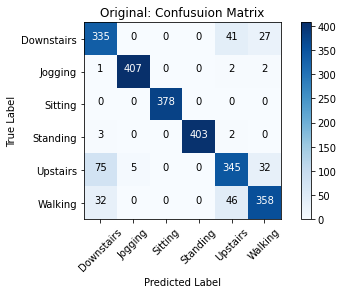

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       403
           1       0.99      0.99      0.99       412
           2       1.00      1.00      1.00       378
           3       1.00      0.99      0.99       408
           4       0.79      0.75      0.77       457
           5       0.85      0.82      0.84       436

    accuracy                           0.89      2494
   macro avg       0.90      0.90      0.90      2494
weighted avg       0.89      0.89      0.89      2494



In [157]:
clf2= KNeighborsClassifier(n_neighbors=4)
knnModel2 = clf2.fit(trainData,trainLabelE)
y_te_pred2 = clf2.predict(testData)

acc2 = accuracy_score(testLabelE,y_te_pred2)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_te_pred2)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_te_pred2))

In [154]:
mmc = metric_learn.RCA()
X_mmc = mmc.fit(trainData,trainLabelE)

/usr/local/lib/python3.7/dist-packages/metric_learn/rca.py:82: UserWarning: The inner covariance matrix is not invertible, so the transformation matrix may contain Nan values. You should remove any linearly dependent features and/or reduce the dimensionality of your input, for instance using `sklearn.decomposition.PCA` as a preprocessing step.
  warnings.warn('The inner covariance matrix is not invertible, '


K-Nearest Neighbors Accuracy: 0.89214
Confusion matrix, without normalization
[[335   0   0   0  36  32]
 [  2 406   0   0   2   2]
 [  0   0 376   2   0   0]
 [  2   0   0 405   1   0]
 [ 81   3   0   0 348  25]
 [ 29   0   0   0  52 355]]


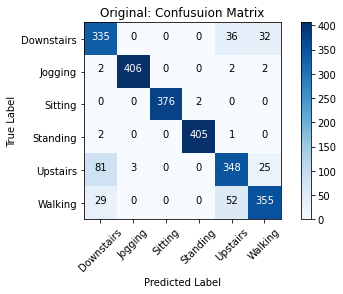

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       403
           1       0.99      0.99      0.99       412
           2       1.00      0.99      1.00       378
           3       1.00      0.99      0.99       408
           4       0.79      0.76      0.78       457
           5       0.86      0.81      0.84       436

    accuracy                           0.89      2494
   macro avg       0.90      0.90      0.90      2494
weighted avg       0.89      0.89      0.89      2494



In [156]:
clf2= KNeighborsClassifier(n_neighbors=4, metric = mmc.get_metric())
knnModel2 = clf2.fit(trainData,trainLabelE)
y_te_pred2 = clf2.predict(testData)

acc2 = accuracy_score(testLabelE,y_te_pred2)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_te_pred2)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_te_pred2))